# Exam 28th of August 2024 — Course 1MS041 (Introduction to Data Science)

## 1.1 Instructions
1. Complete the problems by following instructions.  
2. When done, submit this file with your solutions saved, following the instruction sheet.

This exam has **3 problems** for a total of **40 points**, to pass you need **20 points**.  
The bonus will be added to the score and rounded afterwards.

## 1.2 Some general hints and information
- Try to answer all questions even if you are uncertain.  
- Comment your code — partial credit is given if your reasoning is clear.  
- Follow the instruction sheet rigorously.  
- The exam is partially autograded, but your code and free text answers are manually graded anonymously.

## 1.3 Tips for free text answers
You can write LaTeX in Markdown cells:

- `$f(x) = x^2$` → inline math  
- `$$f(x)=x^2$$` → centered display math  

Example:

$$f_{Y|X}(y,x) = P(Y = y \mid X = x) = \exp(\alpha x + \beta)$$

## 1.4 Rules
- You may **not communicate with others** during the exam.  
- You may **not use AI systems such as ChatGPT**.  
- Your online and offline activity may be monitored.

## 1.5 Good luck!

---

### Insert your anonymous exam ID below:


In [2]:
examID = "XXX"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from scipy import optimize
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    r2_score,
    confusion_matrix,
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


### Exam vB, PROBLEM 1  
**Maximum Points = 14**

In this problem you will do rejection sampling from complicated distributions, and you will also use your samples to compute certain integrals, a method known as *Monte Carlo integration*.  
(Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection.)

1. **[4p]** Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the density, using rejection sampling:

$$f(x) = C (\sin x)^{10}, \quad 0 \le x \le \pi$$


where \(C\) is a value such that \(f\) above is a density (i.e. integrates to one).  
*Hint:* you do not need to know the value of \(C\) to perform rejection sampling.

2. **[2p]** Produce 10 000 samples (use fewer if it takes too long) from the above distribution, put the answer in the variable `problem1_samples`, and plot the histogram.

3. **[2p]** Define \(X\) as a random variable with the density given in part 1. Denote


$$Y = \left(X - \frac{\pi}{2}\right)^2$$


and use the 10 000 samples from part 2 to estimate \(\mathbb{E}[Y]\). Store the result in `problem1_expectation`.

4. **[2p]** Use Hoeffding’s inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

5. **[4p]** Can you calculate an approximation of the value of \(C\) from part 1 using random samples?  
Provide a plot of the histogram from part 2 together with the true density as a curve (this requires the value of \(C\)).  
Explain what method you used and what answer you got.


-----
### Exam vB, PROBLEM 1  
**Maximum Points = 14**

In this problem you will do rejection sampling from complicated distributions, and you will also use your samples to compute certain integrals, a method known as *Monte Carlo integration*.  
(Keep in mind that choosing a good sampling distribution is often key to avoid too much rejection.)

1. **[4p]** Fill in the remaining part of the function `problem1_rejection` in order to produce samples from the density, using rejection sampling:

$$f(x) = C (\sin x)^{10}, \quad 0 \le x \le \pi$$


where \(C\) is a value such that \(f\) above is a density (i.e. integrates to one).  
*Hint:* you do not need to know the value of \(C\) to perform rejection sampling.


-----

In [4]:
# Part 1
def problem1_rejection(n_samples=1):
    """
    Use rejection sampling to draw samples from
        f(x) ∝ (sin x)^10   on [0, π]
    Return a numpy array of length n_samples.
    """
    samples = []
    
    while (len(samples) < n_samples):
        U = np.random.uniform(0, 1)
        x = np.random.uniform(0, np.pi)
        
        # fx = np.sin(x)**10
        # gx = 1/np.pi
        # M = np.pi
        
        # acceptance = np.sin(x)**10   # (fx / (M*gx)) # => acceptance = fx
        
        if (U <= np.sin(x)**10):
            samples.append(x)
            
    return np.array(samples)

# x_vals = np.random.uniform(0, np.pi, 100000)
# fx = np.sin(x_vals)**10
# gx = 1/np.pi

# ratio = fx / gx
# M_est = max(ratio) * 1.05
# print("M estimation is: ", M_est)

-----
2. **[2p]** Produce 10 000 samples (use fewer if it takes too long) from the above distribution, put the answer in the variable `problem1_samples`, and plot the histogram.

-----

In [5]:
# Part 2
n_samples = 10000
problem1_samples = problem1_rejection(n_samples)


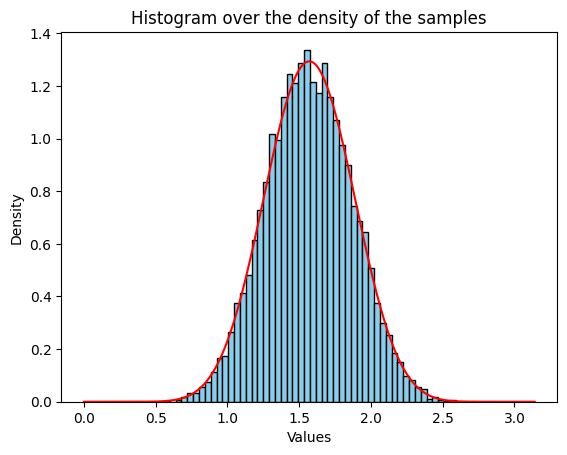

In [6]:
# Plotting:

x_values = np.linspace(0, np.pi, 500)
fx = np.sin(x_values)**10

f_normalized = fx / np.trapezoid(fx, x_values)


# Plotting a basic histogram
plt.hist(problem1_samples, bins=50, density=True, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram over the density of the samples')

plt.plot(x_values, f_normalized, color="red")


# Display the plot
plt.show()

-----
3. **[2p]** Define \(X\) as a random variable with the density given in part 1. Denote


$$Y = \left(X - \frac{\pi}{2}\right)^2$$


and use the 10 000 samples from part 2 to estimate $(\mathbb{E}[Y])$. Store the result in `problem1_expectation`.

-----

In [7]:
# Part 3

n_samples = 10000
X = problem1_rejection(n_samples)
Y = (X - (np.pi/2))**2

EY = np.mean(Y)

problem1_expectation = EY

print("The expectation of Y is: ", problem1_expectation)

The expectation of Y is:  0.09225720081913091


-----
4. **[2p]** Use Hoeffding’s inequality to produce a 95% confidence interval of the expectation above and store the result as a tuple in the variable `problem1_interval`.

-----

In [8]:
# Part 4

# b is max value from Y, which is X value of pi. Then we get:
# (pi - pi/2)^2 => (pi/2)^2
b = (np.pi/2)**2

# a is the minimum value we get from Y, which is X value pi/2
# (pi/2 - pi/2)^2 => 0
a = 0

n_samples = 10000

EY = problem1_expectation

epsilon = (b-a) * np.sqrt(np.log(0.05/2) / (-2*n_samples))

problem1_interval = (EY - epsilon, EY + epsilon)
print("This is the interval we get: ", problem1_interval)

This is the interval we get:  (np.float64(0.05874738907693155), np.float64(0.12576701256133027))


-----
5. **[4p]** Can you calculate an approximation of the value of $(C)$ from part 1 using random samples?  
Provide a plot of the histogram from part 2 together with the true density as a curve (this requires the value of $(C)$).  
Explain what method you used and what answer you got.
-----

In [9]:
# Part 5 — numeric computation of C

n_samples = 10000
x_samples = np.random.uniform(0, np.pi, n_samples)

fx = np.sin(x_samples)**10

a = 0
b = np.pi

I = (b-a)* np.mean(fx)

C = 1/I

problem1_C = C

print("C is approximately: ", problem1_C)

C is approximately:  1.2859639652497086


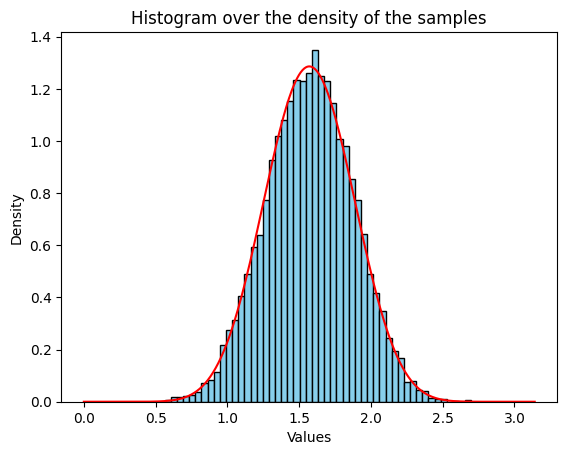

In [10]:
# Part 5 — plot
# Write your plotting code here
# XXXXX

# Plotting:

n_samples = 10000
problem1_samples = problem1_rejection(n_samples)

x_values = np.linspace(0, np.pi, 500)

fx = problem1_C * np.sin(x_values)**10


# Plotting a basic histogram
plt.hist(problem1_samples, bins=50, density=True, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Histogram over the density of the samples')

plt.plot(x_values, fx, color="red")


# Display the plot
plt.show()

## Part 5 — Explanation

Double-click to edit:

### Begin explanation

(Write your method and the approximation of C here.)

### End explanation


## Local Test for Exam vB, PROBLEM 1

Evaluate the cell below to verify that your answers have correct format.

Do NOT modify anything in the test cell.


In [11]:
# This cell checks the format, not correctness
import numpy as np

try:
    assert isinstance(problem1_rejection(10), np.ndarray)
except:
    print("Try again. You should return a numpy array from problem1_rejection")
else:
    print("Good, your problem1_rejection returns a numpy array")

try:
    assert isinstance(problem1_samples, np.ndarray)
except:
    print("Try again. your problem1_samples is not a numpy array")
else:
    print("Good, your problem1_samples is a numpy array")

try:
    assert isinstance(problem1_expectation, float)
except:
    print("Try again. your problem1_expectation is not a float")
else:
    print("Good, your problem1_expectation is a float")

try:
    assert (isinstance(problem1_interval, list) or isinstance(problem1_interval, tuple))
    assert len(problem1_interval) == 2
except Exception as e:
    print(e)
else:
    print("Good, your problem1_interval is a tuple or list of length 2")

Good, your problem1_rejection returns a numpy array
Good, your problem1_samples is a numpy array
Good, your problem1_expectation is a float
Good, your problem1_interval is a tuple or list of length 2


## 2.1 Exam vB, PROBLEM 2  
**Maximum Points: 13**

Consider the dataset `CORIS.csv` in the `data` folder. The dataset contains cases of coronary heart disease (CHD) and variables associated with the patient’s condition:

- systolic blood pressure (`sbp`)
- yearly tobacco use in kg (`tobacco`)
- low density lipoprotein (`ldl`)
- adiposity
- family history (0 or 1) (`famhist`)
- type A personality score (`typea`)
- obesity (body mass index)
- alcohol use
- age
- diagnosis of CHD (0 or 1) (`chd`)

Here:
- **X** corresponds to the measurements,
- **Y** is a 0–1 label where 1 represents CHD and 0 represents no CHD.

The code to load the data, perform a train–test–validation split, and train a model is already prepared for you.  
The trained model is stored in `problem2_pipe`, which is an `sklearn` `Pipeline`.

---

### **1. [3p]**

Use **Hoeffding’s inequality** and compute the **95% confidence intervals** for **precision and recall** (etc.) on the **test set**.  
Store your intervals for each class in the variables:

- `problem2_precision0`
- `problem2_recall0`
- `problem2_precision1`
- `problem2_recall1`

Each of these should be a **tuple** `(lower, upper)`.

---

### **2. [3p]**

You are interested in minimizing the **average cost** of your classifier.  
The hospital will use the model as a screening tool:

- If the model predicts **CHD = 1**, the patient is sent for further investigation.
- If the model predicts **CHD = 0**, nothing is done.

You decide to use the following costs:

- True positive (CHD = 1, predicted 1): cost = 0  
- True negative (CHD = 0, predicted 0): cost = 0  
- False positive (CHD = 0, predicted 1): cost = 10  
- False negative (CHD = 1, predicted 0): cost = 300  *(worst case)*

Complete the function `problem2_cost(model, threshold, X, Y)` to compute the **average cost per person** for a given prediction threshold, using `model.predict_proba`.

---

### **3. [4p]**

Select the **threshold** between 0 and 1 that minimizes the **average cost** on the **test set**.  
Check, for example, **100 evenly spaced thresholds** between 0 and 1.

Store:

- the optimal threshold in `problem2_optimal_threshold`
- the cost at this threshold (on the test set) in `problem2_cost_at_optimal_threshold`

---

### **4. [3p]**

With your newly computed threshold, compute the **cost of putting the model in production** by evaluating the cost on the **validation set**.

Also compute a **99% confidence interval** for this cost using **Hoeffding’s inequality**, and store it as:

- `problem2_cost_at_optimal_threshold_validation`
- `problem2_cost_interval = (lower, upper)`


In [12]:
# RUN THIS CELL TO LOAD THE DATA AND SPLIT IT INTO TRAINING, TEST AND VALIDATION SETS
# FINALLY IT TRAINS THE MODEL AS A PIPELINE

import pandas as pd
from sklearn.model_selection import train_test_split

CORISDataset = pd.read_csv("data/CORIS.csv", skiprows=[1, 2])

# Initial data split into features and target
problem2_X = CORISDataset[
    ['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
].values  # Features
problem2_Y = CORISDataset['chd'].values  # Target variable

# Split the data into training, test and validation sets
problem2_X_train, X_tmp, problem2_Y_train, Y_tmp = train_test_split(
    problem2_X, problem2_Y, train_size=0.6, random_state=42
)
problem2_X_test, problem2_X_val, problem2_Y_test, problem2_Y_val = train_test_split(
    X_tmp, Y_tmp, train_size=0.5, random_state=42
)

# Show the shapes of the data
print(
    problem2_X_train.shape,
    problem2_Y_train.shape,
    problem2_X_test.shape,
    problem2_Y_test.shape,
    problem2_X_val.shape,
    problem2_Y_val.shape,
)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Create a pipeline with a scaler and a logistic regression model
problem2_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(random_state=42)),
])

# Fit the pipeline to the training data
problem2_pipe.fit(problem2_X_train, problem2_Y_train)


(277, 9) (277,) (92, 9) (92,) (93, 9) (93,)


,steps,"[('scaler', ...), ('logreg', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0


-----
## 2.1 Exam vB, PROBLEM 2  
**Maximum Points: 13**

Consider the dataset `CORIS.csv` in the `data` folder. The dataset contains cases of coronary heart disease (CHD) and variables associated with the patient’s condition:

- systolic blood pressure (`sbp`)
- yearly tobacco use in kg (`tobacco`)
- low density lipoprotein (`ldl`)
- adiposity
- family history (0 or 1) (`famhist`)
- type A personality score (`typea`)
- obesity (body mass index)
- alcohol use
- age
- diagnosis of CHD (0 or 1) (`chd`)

Here:
- **X** corresponds to the measurements,
- **Y** is a 0–1 label where 1 represents CHD and 0 represents no CHD.

The code to load the data, perform a train–test–validation split, and train a model is already prepared for you.  
The trained model is stored in `problem2_pipe`, which is an `sklearn` `Pipeline`.

---

### **1. [3p]**

Use **Hoeffding’s inequality** and compute the **95% confidence intervals** for **precision and recall** (etc.) on the **test set**.  
Store your intervals for each class in the variables:

- `problem2_precision0`
- `problem2_recall0`
- `problem2_precision1`
- `problem2_recall1`

Each of these should be a **tuple** `(lower, upper)`.

---


In [13]:
# Part 1
# To make a prediction on a dataset `X` you can use the following code:
#   predictions = problem2_pipe.predict(X)
# As with any sklearn model, you can also use:
#   probas = problem2_pipe.predict_proba(X)

# Each precision and recall should be a tuple, for instance:
#   precision0 = (0.9, 0.95)
# The 0 or 1 in the variable name indicates the class.

y_test = problem2_Y_test
y_pred = problem2_pipe.predict(problem2_X_test)

tn, fp, fn, tp = confusion_matrix(y_test, y_pred, labels=[0, 1]).ravel()
print((tn, fp, fn, tp))

def hoeffding(n, p):
    alpha = 0.05
    epsilon = np.sqrt(np.log(alpha/2) / (-2*n))
    lower = p - epsilon
    upper = p + epsilon
    return (lower, upper)

# ----- number of samples used in each estimate -----

# precision for class 0: predicted 0 → tn + fn
n_prec0 = tn + fn          # NOT fp + tn

# precision for class 1: predicted 1 → tp + fp
n_prec1 = tp + fp          # NOT tp + fn

# recall for class 0: actual 0 → tn + fp
n_rec0 = tn + fp           # NOT fp + tp

# recall for class 1: actual 1 → tp + fn
n_rec1 = tp + fn           # NOT tp + fp


# ----- point estimates -----

# precision class 0: tn / (tn + fn)
prec0 = tn / (tn + fn)     # NOT fp / (fp + tn)

# precision class 1: tp / (tp + fp)
prec1 = tp / (tp + fp)     # NOT tp / (tp + fn)

# recall class 0: tn / (tn + fp)
rec0 = tn / (tn + fp)      # NOT fp / (fp + tp)

# recall class 1: tp / (tp + fn)
rec1 = tp / (tp + fn)      # NOT tp / (tp + fp)



problem2_precision0 = hoeffding(n_prec0, prec0)
problem2_recall0    = hoeffding(n_rec0, rec0)
problem2_precision1 = hoeffding(n_prec1, prec1)
problem2_recall1    = hoeffding(n_rec1, rec1)

# The code below will check that you supply the proper type
assert(type(problem2_precision0) == tuple)
assert(len(problem2_precision0) == 2)
assert(type(problem2_recall0) == tuple)
assert(len(problem2_recall0) == 2)
assert(type(problem2_precision1) == tuple)
assert(len(problem2_precision1) == 2)
assert(type(problem2_recall1) == tuple)
assert(len(problem2_recall1) == 2)

(np.int64(49), np.int64(9), np.int64(15), np.int64(19))


---
### **2. [3p]**

You are interested in minimizing the **average cost** of your classifier.  
The hospital will use the model as a screening tool:

- If the model predicts **CHD = 1**, the patient is sent for further investigation.
- If the model predicts **CHD = 0**, nothing is done.

You decide to use the following costs:

- True positive (CHD = 1, predicted 1): cost = 0  
- True negative (CHD = 0, predicted 0): cost = 0  
- False positive (CHD = 0, predicted 1): cost = 10  
- False negative (CHD = 1, predicted 0): cost = 300  *(worst case)*

Complete the function `problem2_cost(model, threshold, X, Y)` to compute the **average cost per person** for a given prediction threshold, using `model.predict_proba`.

---


In [14]:
# Part 2
def problem2_cost(model, threshold, X, Y):
    """
    Compute the average cost per person for a given model, threshold, and dataset (X, Y).

    Costs:
        - True positive  (Y=1, pred=1): 0
        - True negative  (Y=0, pred=0): 0
        - False positive (Y=0, pred=1): 10
        - False negative (Y=1, pred=0): 300
    """

    # 1. Get predicted probabilities for class 1 (CHD = 1)
    # model.predict_proba(X) returns an array of shape (n_samples, 2)
    # [:, 1] selects the probability of class 1 for each sample
    pred_proba = model.predict_proba(X)[:, 1]

    # 2. Convert probabilities to hard predictions using the threshold
    # If prob >= threshold -> predict 1, else 0
    predictions = (pred_proba >= threshold) * 1

    # 3. Count false positives and false negatives
    # False positive: true label 0, predicted 1
    fp = np.sum((Y == 0) & (predictions == 1))

    # False negative: true label 1, predicted 0
    fn = np.sum((Y == 1) & (predictions == 0))

    # 4. Compute total cost using the cost table
    total_cost = fp * 10 + fn * 300

    # 5. Compute and return average cost per person
    average_cost = total_cost / len(Y)
    return average_cost


---

### **3. [4p]**

Select the **threshold** between 0 and 1 that minimizes the **average cost** on the **test set**.  
Check, for example, **100 evenly spaced thresholds** between 0 and 1.

Store:

- the optimal threshold in `problem2_optimal_threshold`
- the cost at this threshold (on the test set) in `problem2_cost_at_optimal_threshold`

---


In [15]:
# Part 3
thresholds = np.linspace(0, 1, 100)
best_t = np.inf
best_cost = np.inf



for t in thresholds:
    cost = problem2_cost(problem2_pipe, t, problem2_X_test, problem2_Y_test)
    
    if cost < best_cost:
        best_cost = cost
        best_t = t


problem2_optimal_threshold = best_t
problem2_cost_at_optimal_threshold = best_cost

print("This is the optimal threshold t: ", problem2_optimal_threshold)
print("This is the best cost at threshold t: ", problem2_cost_at_optimal_threshold)

This is the optimal threshold t:  0.07070707070707072
This is the best cost at threshold t:  5.217391304347826


---

### **4. [3p]**

With your newly computed threshold, compute the **cost of putting the model in production** by evaluating the cost on the **validation set**.

Also compute a **99% confidence interval** for this cost using **Hoeffding’s inequality**, and store it as:

- `problem2_cost_at_optimal_threshold_validation`
- `problem2_cost_interval = (lower, upper)`

---

In [16]:
# Part 4

threshold = best_t

cost = problem2_cost(problem2_pipe, threshold, problem2_X_val, problem2_Y_val)

b = 300
a = 0

alpha = 0.01
n = len(problem2_Y_val)

epsilon = (b-a)*np.sqrt(np.log(alpha/2) / (-2*n))


lower = max(a, cost - epsilon)
upper = min(b, cost + epsilon)

problem2_cost_at_optimal_threshold_validation = cost

# Report the cost interval as a tuple cost_interval = (a, b)
problem2_cost_interval = (lower, upper)


print("This is cost at optimal threshold validation set: ", problem2_cost_at_optimal_threshold_validation)
print("This is the cost interval: ", problem2_cost_interval)

This is cost at optimal threshold validation set:  5.698924731182796
This is the cost interval:  (0, np.float64(56.33193719889502))


In [17]:
# The code below will tell you if you filled in the interval correctly
assert(type(problem2_cost_interval) == tuple)
assert(len(problem2_cost_interval) == 2)

# 2.2 Exam vB, PROBLEM 3  
**Maximum Points: 13**

![Markov Chains](exam240828-markovImage.png)

Consider the following two Markov chains:

**Markov chain A**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Markov chain B**


Answer each question for **both chains**:

---

### **1. [2p]**  
What is the **transition matrix**?  
Your answer for each chain should be a NumPy array of shape `(n_states, n_states)`  
where states `(A, B, …)` correspond to indices `(0, 1, …)`.

---

### **2. [1p]**  
Is the Markov chain **irreducible**?  
Answer with `True` or `False` for each chain.

---

### **3. [4p]**  
Is the Markov chain **aperiodic**?  
What is the **period of each state**?

Provide:

- a boolean (`True`/`False`) indicating if the chain is aperiodic
- a NumPy array with the **period of each state**, shape `(n_states,)`

*Hint:* Recall the definition of period:  

$$\text{period}(i) = \gcd\{\, t \ge 1 : P(X_t = i \mid X_0 = i) > 0 \,\}$$


---

### **4. [2p]**  
If the chain starts in state A at time 0, what is the probability of being in state B at time 5?  

Store this in:

- `problem3_A_PB5`
- `problem3_B_PB5`

---

### **5. [4p]**  
Let \(T\) be the **first hitting time of state D**, starting from state A:


$$T(\omega) = \inf \{\, t \in \mathbb{N} : X_t(\omega) = D \,\}$$


where the infimum over an empty set is $\infty$.

Compute:

- $P(T = 1)$  
- $P(T = 2)$  
- $P(T = 3)$  
- $P(T = 4)$  
- $P(T = 5)$  
- $P(T = \infty)$  


for both chains A and B, and store them in the provided variables.


# 2.2 Exam vB, PROBLEM 3  
**Maximum Points: 13**

![Markov Chains](exam240828-markovImage.png)

Consider the following two Markov chains:

**Markov chain A**  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; **Markov chain B**


Answer each question for **both chains**:

---

### **1. [2p]**  
What is the **transition matrix**?  
Your answer for each chain should be a NumPy array of shape `(n_states, n_states)`  
where states `(A, B, …)` correspond to indices `(0, 1, …)`.

---


In [18]:
# PART 1
# ------------------------ TRANSITION MATRIX -------------------------------

# Supply each transition matrix as a numpy array of shape (n_states, n_states).
# State order must match exam order, typically (A, B, C, D, ...).

problem3_A = np.array([[0,0.2,0,0.8], [0,0,1,0], [0,1,0,0], [0.5,0,0.5,0]])
print("Array A: \n", problem3_A)
problem3_B = np.array([[0,1,0,0,0,0], [0,0,1,0,0,0], [0,0.5,0,0.5,0,0], [0,0,0.5,0,0.5,0], [0,0,0,0,0,1], [0.5,0,0,0,0.5,0]])
print("Array B: \n", problem3_B)

Array A: 
 [[0.  0.2 0.  0.8]
 [0.  0.  1.  0. ]
 [0.  1.  0.  0. ]
 [0.5 0.  0.5 0. ]]
Array B: 
 [[0.  1.  0.  0.  0.  0. ]
 [0.  0.  1.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  1. ]
 [0.5 0.  0.  0.  0.5 0. ]]


---

### **2. [1p]**  
Is the Markov chain **irreducible**?  
Answer with `True` or `False` for each chain.

---


In [19]:
# PART 2
# ------------------------ IRREDUCIBLE -------------------------------

problem3_A_irreducible = False
problem3_B_irreducible = True

---

### **3. [4p]**  
Is the Markov chain **aperiodic**?  
What is the **period of each state**?

Provide:

- a boolean (`True`/`False`) indicating if the chain is aperiodic
- a NumPy array with the **period of each state**, shape `(n_states,)`

*Hint:* Recall the definition of period:  

$$\text{period}(i) = \gcd\{\, t \ge 1 : P(X_t = i \mid X_0 = i) > 0 \,\}$$


---


![Markov Chains](exam240828-markovImage.png)

In [20]:
# PART 3
# ------------------------ APERIODIC -------------------------------

# Answer each with True or False
problem3_A_is_aperiodic = False
problem3_B_is_aperiodic = False
# print(math.gcd(2, 4, 6, 8))
# A numpy array of shape (n_states,) containing periods for each state
problem3_A_periods = np.array([2, 2, 2, 2])
problem3_B_periods = np.array([2, 2, 2, 2, 2, 2])

---

### **4. [2p]**  
If the chain starts in state A at time 0, what is the probability of being in state B at time 5?  

Store this in:

- `problem3_A_PB5`
- `problem3_B_PB5`

---


![Markov Chains](exam240828-markovImage.png)

In [21]:
# PART 4
# ------------------------ PROBABILITY OF B AFTER 5 STEPS -------------------------------
P5_A = np.linalg.matrix_power(problem3_A, 5)
P5_B = np.linalg.matrix_power(problem3_B, 5)
# could also do this: P5_A[0][1]

# print("P^5 for problem3_A:\n", P5_A)
# print("P^5 for problem3_B:\n", P5_B)

problem3_A_PB5 = P5_A[0, 1]   # P(X5=B | X0=A) for chain A
problem3_B_PB5 = P5_B[0, 1]   # P(X5=B | X0=A) for chain B

print("problem3_A_PB5:", problem3_A_PB5)  # 0.872
print("problem3_B_PB5:", problem3_B_PB5)  # 0.375

problem3_A_PB5: 0.872
problem3_B_PB5: 0.375


---

### **5. [4p]**  
Let \(T\) be the **first hitting time of state D**, starting from state A:


$$T(\omega) = \inf \{\, t \in \mathbb{N} : X_t(\omega) = D \,\}$$


where the infimum over an empty set is $\infty$.

Compute:

- $P(T = 1)$  
- $P(T = 2)$  
- $P(T = 3)$  
- $P(T = 4)$  
- $P(T = 5)$  
- $P(T = \infty)$  


for both chains A and B, and store them in the provided variables.
---

![Markov Chains](exam240828-markovImage.png)

In [ ]:
# PART 5
# ------------------------ HITTING TIME DISTRIBUTION -------------------------------

# Probabilities for T = 1, 2, 3, 4, 5, and ∞ for chain A
problem3_A_PT1 = 0.8
problem3_A_PT2 = 0
problem3_A_PT3 = 0
problem3_A_PT4 = 0
problem3_A_PT5 = 0
problem3_A_PT_inf = 0.2

# Probabilities for chain B
problem3_B_PT1 = 0
problem3_B_PT2 = 0
problem3_B_PT3 = 0.5
problem3_B_PT4 = 0
problem3_B_PT5 = 0.25
problem3_B_PT_inf = 0